# NLP PROJECT
## IDENTIFYING SPAM EMAIL BY CREATING NLP MODEL WITH TENSORFLOW

Written by: Muchammad Malik

Notes:

1. Dataset is retrived from Kaggle, on July 6 2021. Dataset source: https://www.kaggle.com/venky73/spam-mails-dataset
2. Dataset filetype is csv, which titled as spam_ham_dataset.csv
3. Dataset file is on the same folder with this notebook file
4. Maximum accuracy in the last experiment is 0,9746

## Outline : 
1. Data Understanding
2. Machine Learning Modelling
3. Model Evaluation

In [1]:
import numpy as np
import pandas as pd

## Data Understanding

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
#column identification
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

## Machine Learning Modelling

In [4]:
#separate features with label
x = df['text'].values
y = df['label_num'].values

In [5]:
#separate training data and validation data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
#import library Tokenizer dan sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Word Tokenization. num_words is set to 15000 because the data has 5000+ rows dan the sentences are long.
tokenizer = Tokenizer(num_words=15000, oov_token='-')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
#Change text data to be sequences
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

#Simillarize the length of the sequences
padding_train = pad_sequences(sequences_train) 
padding_test = pad_sequences(sequences_test)

In [7]:
#Import Tensorflow library
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=15000, output_dim=16),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

#loss type is set to binary crossentropy because label has 2 classes, which are spam dan ham
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#Stop the training when accuracy reachs 95% with the callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    a = 0
    if(logs.get('accuracy')>0.95):
      print("\nAccuracy is reached >95%!")
      a = a+1
      self.model.stop_training = True
callbacks = myCallback()

num_epochs = 10
history = model.fit(padding_train, y_train, 
                    steps_per_epoch = 10,
                    epochs=num_epochs, 
                    validation_data=(padding_test, y_test), 
                    validation_steps = 5,
                    verbose=1,
                    callbacks = [callbacks])

Epoch 1/10
10/10 [==============================] - 99s 10s/step - loss: 0.6769 - accuracy: 0.7026 - val_loss: 0.6453 - val_accuracy: 0.7391
Epoch 2/10
10/10 [==============================] - 100s 10s/step - loss: 0.6204 - accuracy: 0.7029 - val_loss: 0.5557 - val_accuracy: 0.7391
Epoch 3/10
10/10 [==============================] - 101s 10s/step - loss: 0.5382 - accuracy: 0.7029 - val_loss: 0.4492 - val_accuracy: 0.7391
Epoch 4/10
10/10 [==============================] - 102s 10s/step - loss: 0.4058 - accuracy: 0.7321 - val_loss: 0.2895 - val_accuracy: 0.8841
Epoch 5/10
10/10 [==============================] - 100s 10s/step - loss: 0.2470 - accuracy: 0.9362 - val_loss: 0.1983 - val_accuracy: 0.9575
Epoch 6/10
10/10 [==============================] - ETA: 0s - loss: 0.1789 - accuracy: 0.9746
Accuracy is reached >95%!
10/10 [==============================] - 101s 10s/step - loss: 0.1789 - accuracy: 0.9746 - val_loss: 0.1445 - val_accuracy: 0.9671


## Model Evaluation

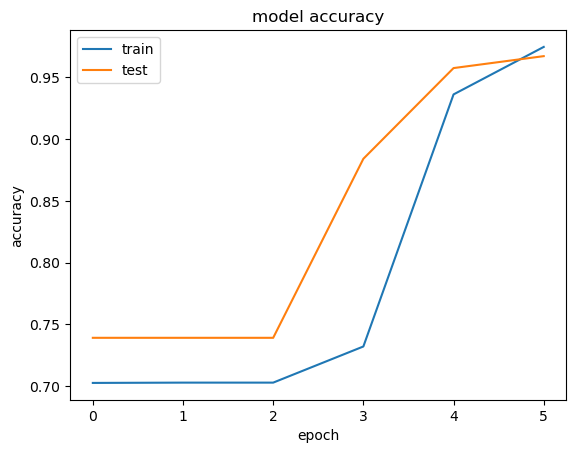

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

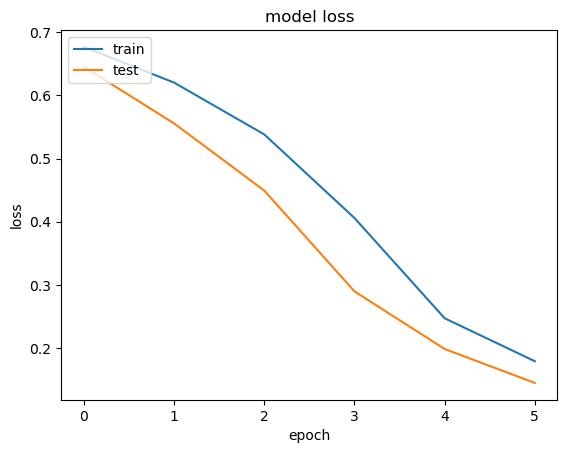

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()